# Detecting Payment Card Fraud

**Loading the Data**

In [ ]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c534768_creditcardfraud/creditcardfraud.zip
!unzip creditcardfraud

--2020-09-24 18:20:06--  https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c534768_creditcardfraud/creditcardfraud.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.28.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.28.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155632 (66M) [application/zip]
Saving to: ‘creditcardfraud.zip’

creditcardfraud.zip 100%[===================>]  65.95M  27.4MB/s    in 2.4s    

2020-09-24 18:20:09 (27.4 MB/s) - ‘creditcardfraud.zip’ saved [69155632/69155632]

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


**Importing the libraries**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [11]:
dataSet = pd.read_csv('/content/drive/My Drive/data/creditcard.csv')

In [27]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [73]:
dataSet.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [72]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
fraud = dataSet[dataSet['Class'] == 1].shape[0]
valid = dataSet[dataSet['Class'] == 0].shape[0]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Fraudulent:		 492
Valid:			 284315
Fraudulent Percentage:	 0.001727485630620034



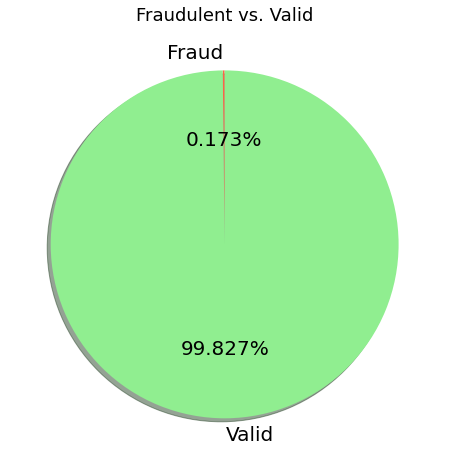

In [57]:
fraud_percentage = fraud / (fraud + valid)


print('Fraudulent:\t\t', fraud)
print('Valid:\t\t\t', valid)
print('Fraudulent Percentage:\t', fraud_percentage, end='\n\n')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Fraudulent vs. Valid', size=18)
plt.pie([fraud, valid], labels=['Fraud', 'Valid'], colors=['tomato', 'lightgreen'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

**Features and Labels**

In [14]:
X = dataSet.iloc[:, 1:-1].values
y = dataSet.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the ANN model on the Training set**

**Building the ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
ann = Sequential()

# Adding the input layer and a first hidden layer
ann.add(Dense(units=64, activation='relu'))

# Adding the output layer
ann.add(Dense(units=1, activation='sigmoid'))

**Training the ANN**

In [23]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 64, epochs = 20)

Epoch 1/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0196 - accuracy: 0.9956
Epoch 2/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 4/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 6/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 7/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 8/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 10/20
3338/3338 [==============================] - 7s 2ms/step - loss: 0.001

In [66]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1920      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


**Making the predictions**

In [ ]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

**Evaluating the model**

Accuracy:	0.9994803516755147
Precision:	0.8672566371681416
Recall:		0.8166666666666667




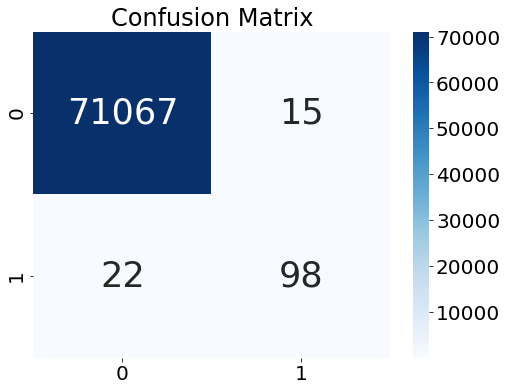

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
print('Precision:', precision_score(y_test, y_pred), sep='\t')
print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
plt.show()

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.87      0.82      0.84       120

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202

